# Welcome to Colaboratory

Colab, or "Colaboratory," allows you to write and execute Python in your browser, with

- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist**, or an **AI** researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

All of the material in this course can be opened in colaboratory using the rocketship icon from the JupyterBook


## **Getting started**

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:


In [1]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day


86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code or use the keyboard shortcut "Command/Ctrl+Enter." To edit the code, click the cell and start editing.

Variables that you define in one cell can later be used in other cells:


In [2]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week


604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML, **LaTeX**, and more. 
* When you create your own Colab notebooks, they are stored in your Google Drive account. 
* You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). 
* To create a new Colab notebook, use the File menu above or the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that Colab hosts. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).


<div class="markdown-google-sans">

## Data Science

</div>
With Colab, you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data and uses **matplotlib** to visualize it. To edit the code, click the cell and start editing.


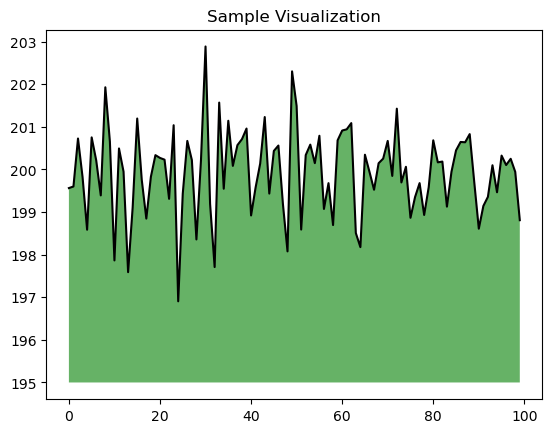

In [3]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, "k-")
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor="g", alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).


## Machine learning
With Colab, you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.


## Colab with GPU

This notebook provides an introduction to computing on a [GPU](https://cloud.google.com/gpu) in Colab. In this notebook, you will connect to a GPU and then run some basic TensorFlow operations on both the CPU and a GPU, observing the speedup provided by using the GPU.


### Enabling and testing the GPU

First, you'll need to enable GPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

Next, we'll confirm that we can connect to the GPU with TensorFlow:


In [4]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != "/device:GPU:0":
    raise SystemError("GPU device not found")
print("Found GPU at: {}".format(device_name))

Found GPU at: /device:GPU:0Metal device set to: Apple M1 Max



2022-10-11 13:54:46.930243: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-11 13:54:46.930375: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Observe TensorFlow speedup on GPU relative to CPU

This example constructs a typical convolutional neural network layer over a
random image and manually places the resulting ops on the CPU or the GPU
to compare execution speed.


In [5]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != "/device:GPU:0":
    print(
        "\n\nThis error most likely means that this notebook is not "
        "configured to use a GPU.  Change this in Notebook Settings via the "
        "command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n"
    )
    raise SystemError("GPU device not found")


def cpu():
    with tf.device("/cpu:0"):
        random_image_cpu = tf.random.normal((100, 100, 100, 3))
        net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
        return tf.math.reduce_sum(net_cpu)


def gpu():
    with tf.device("/device:GPU:0"):
        random_image_gpu = tf.random.normal((100, 100, 100, 3))
        net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
        return tf.math.reduce_sum(net_gpu)


# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print(
    "Time (s) to co nvolve 32x7x7x3 filter over random 100x100x100x3 images "
    "(batch x height x width x channel). Sum of ten runs."
)
print("CPU (s):")
cpu_time = timeit.timeit("cpu()", number=10, setup="from __main__ import cpu")
print(cpu_time)
print("GPU (s):")
gpu_time = timeit.timeit("gpu()", number=10, setup="from __main__ import gpu")
print(gpu_time)
print("GPU speedup over CPU: {}x".format(int(cpu_time / gpu_time)))

Time (s) to co nvolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):


2022-10-11 13:54:46.936622: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-11 13:54:46.936634: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-10-11 13:54:46.936973: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-11 13:54:46.936979: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


0.5061626669994439
GPU (s):
0.12393245899875183
GPU speedup over CPU: 4x


## Applications of Google Colab

Colab is used extensively in the machine learning community with applications including:

- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

See sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.
